                                                       Workshop 7: Maria Balaet and Valentina Giunchiglia

# Topic Modelling on drug use free text data

The aim of this workshop is to introduce you the application of **natural language processing (NLP)** algorithms to study free text data. NLP is a branch of artificial intelligence that focuses on trying to understand written and spoken text. In this workshop, we will focus specifically on **topic modelling**, which is an unsupervised machine learning method that automatically analyses groups of words to identify clusters of words that belong to the same topic, or theme.

In particular, we will use topic. modelling to try to understand the reasons behind the change in drug use patterns of recreational drug users during the early stages of the pandemic. In the morning, we will investigate why recreational drug users decided to increase their use, later in the day you will apply what you learnt in this stage of the workshop to understand why they decided to decrease their drug use.


The first thing we need to do is to download and import the packages we will need during the lecture, and to change the display settings in order to be able to visualise more rows and columns when printing dataframes. Today, we will work a lot with two new python modules called `gensim` and `nltk`. `gensim` is one of the most coimmonly used module for topic modelling in Python, and `nltk` is a NLP Python toolkit.

In [ ]:
!pip install gensim nltk

In [65]:
import pandas as pd
import warnings 
import gensim
import nltk

warnings.filterwarnings('ignore')

pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', 500)

Now, let's import the data that we will use during the workshop and let's check them out. As you can see, the dataframe consists of three columns that report the user ids, whether the drug use of participants increased or decreased during the pandemic and the reasons behind this change in format of free text. 

In [24]:
reasons_for_change_dec2020_more = pd.read_csv("Data/Day7_morning.csv")

In [25]:
reasons_for_change_dec2020_more

,user_id,How has your drug use changed due to the pandemic?,Why has your drug use changed during the pandemic?
0,107cee6d-0024-4861-90be-2f467758776c,I am using more,Increase in marijuana use for relaxation/stress relief
1,2feae3b8-ea3b-4750-acec-02418f995199,I am using more,Microdosing psilocybin
2,3a476ba2-6dbb-42d1-b0f5-c877c0f368d8,I am using more,Boredom
3,3f8b0ac6-200f-49b4-b061-70084536d519,I am using more,"I’m bored and have more free time. Also I have found more people that sell shrooms, which is unrelated to the pandemic"
4,4be44530-aeab-4302-bd92-b000b4eae2fb,I am using more,Went to university
...,...,...,...
285,6fbf9bf3-1e5a-4fde-98be-6015accde42b,I am using more,boredom
286,e262433c-094a-4f35-8b6a-0c6689b2185f,I am using more,Boredom
287,8862877f-c12e-4680-8b7f-04657ae97cbd,I am using more,More time at home
288,035a1239-932f-4dc2-9ae8-4ccad6e7be08,I am using more,I'm more bored and frightened when I read the news



---------
### Code here
The column names of the dataframes are quite long and the row names are not really easy to interpret. 

1. Replace the column headers with the names "how" and "why" respectively for "How has your drug use changed due to the pandemic?" and "Why has your drug use changed during the pandemic?". 
2. Set the user ids as row index
3. Since we are analysing only the participants, the "how" column should have only "I am using more" answers, check that it is the case.
4. Confirm that there are no missing values

In [31]:
## CODE HERE
reasons_for_change_dec2020_more.rename(columns = {"Why has your drug use changed during the pandemic?": "why"}, inplace = True)

--------
Now that we have a better looking dataframe, let's check out the answers in the *why* column.

In [32]:
reasons_for_change_dec2020_more['why'].to_list()

['Increase in marijuana use for relaxation/stress relief',
 'Microdosing psilocybin ',
 'Boredom',
 'I’m bored and have more free time. Also I have found more people that sell shrooms, which is unrelated to the pandemic',
 'Went to university ',
 'To soothe my anxiety ',
 'Creative thinking, stress management.',
 'Am at home a lot more and I like the way cannabis makes me feel',
 'Entertainment',
 'Pressure from people',
 'Fewer events, makes for a more exciting evening',
 'Depression, loneliness, feeling of feeling empty, a void something missing, split with a partner out the blue. ',
 'More time spent being bored and at a loss of how to pass the time. Also, feeling low and taking recreational drugs to try and feel better',
 'smoking weed cures boredom ',
 "Boredom/accessibility/situational. I have done E twice during this period, separated by around 3 months, and ket twice, separated by about 4 months, so I'm not concerned about restricting myself, or doing so to excess.",
 'Anxiety,

 By quickly looking at the answers, it appears that one of the main reasons for starting to use more drugs during the pandemic was *boredom*. However, different people express the same concept in slightly different ways. Let's print a few answers. 

In [33]:
print(reasons_for_change_dec2020_more['why'][3], "\n",
      reasons_for_change_dec2020_more['why'][14],"\n",
      reasons_for_change_dec2020_more['why'][34]
     )

I’m bored and have more free time. Also I have found more people that sell shrooms, which is unrelated to the pandemic 
 Boredom/accessibility/situational. I have done E twice during this period, separated by around 3 months, and ket twice, separated by about 4 months, so I'm not concerned about restricting myself, or doing so to excess. 
 Boredom and loneliness 


If you look more carefully, you will notice a few other things: 1) some people wrote boredom with or without capital letters, 2) some answers have empty spaces, 3) other answers have special characters, 4) some words are spelled incorrectly... All these aspects are just few examples of the noise that free text answers have, and that need to be removed before starting any analysis. The data cleaning step in free text analysis is **fundamental**!


In [37]:
print(reasons_for_change_dec2020_more['why'][285], "\n",
      reasons_for_change_dec2020_more['why'][286],"\n",
      reasons_for_change_dec2020_more['why'][281], "\n",
      reasons_for_change_dec2020_more['why'][278], "\n",
      reasons_for_change_dec2020_more['why'][273], "\n",
     )

boredom 
 Boredom  
 / 
 Boredom but stopped.now 
 Bordem 




Data cleaning is necessary to remove errors in the data, and reduce to the minimum the noise in order to include in the analysis only what is essential. The most important data cleaning steps of free text data are the following:

1. **Turning all letters to lower case:** this is important otherwise words with capital letters will be mistakenly be recognised as different compared to the same words without capital letters (e.g This and this).
2. **Removal of punctuation, special characters and digits**: punctuation creates noise in the data. It cannot be used to make sense of the meaning of a topic because it does not represent words and computer don't know how to interpret it.
3. **Tokenization**: method that consists of separating a piece of text (in this case the answers of each participants) into smaller linguistic units called tokens (in this case words). 
4. **Stop words removal**: method that consists in removing words that are really common in english, but don't provide much information, such as "to", "in" or "when. These words just create noise in the data.

Let's complete these cleaning steps. First, we will turn everything to lower case. 

In [40]:
reasons_for_change_dec2020_more['why'] = reasons_for_change_dec2020_more['why'].str.lower() 

Then, we remove all punctuations (e.g. *,* or *.*), special characters (e.g. *?,/* and *&*) and digits.

In [48]:
reasons_for_change_dec2020_more['why'] = reasons_for_change_dec2020_more['why'].str.replace('[,\.!?/&]', '')
reasons_for_change_dec2020_more['why'] = reasons_for_change_dec2020_more['why'].str.replace('\d+', '')

Now, let's save the free text data into a separate variable, and let's check it out. Were all digits, punctuations, and special characters removed?

In [ ]:
data = reasons_for_change_dec2020_more['why'].to_list()
data

The next step of the data cleaning and preparation is **tokenization**. Tokenization is necessary to make the sentences analysable and understandable for the computer, and consists of splitting each answer of participants into lists of individual words. There is a function in the gensim package that can do this directly, by taking as input each separate answer, called `simple_preprocess`. By providing as argument `deacc=True`, the function removes punctuations if it finds any. 

In [61]:
data_words = []
for sentence in data:
    listwords = gensim.utils.simple_preprocess(str(sentence), deacc=True)
    data_words.append(listwords)
    
data_words[10]   

['fewer', 'events', 'makes', 'for', 'more', 'exciting', 'evening']

Check different elements in the *data_words* list. Do yo understand how tokenization works?

Now that we have the answers in terms of lists of words, we can do some cleaning on the words themselves. The first thing we are going to do is to remove the stop words, or commonly used words in the english language. Luckily, the *nltk* module has alredy a list lf

In [71]:
nltk.download('stopwords')
stop = nltk.corpus.stopwords.words('english') 
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/valentinagiunchiglia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [262]:

#REMOVE STOPWORDS. words like 'to', 'in', 'when' are considered stop words and are too frequent in english language. including these would add noise to our data.
stop = stopwords.words('english') #import the stop word dictionary
custom_stop = ['pizza','goes','with','pineapple'] #always a good idea to add extra filters for words not included so you can narrow down the bag of words even more

stop_all=stop+custom_stop    
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_all] for doc in texts]

data_words = remove_stopwords(data_words)

#LEMMATIZATION. this is perhaps the most important step. to reduce the dimensionality of data, lematization turns each word to its dictionary infinitive form.
#so words like "swim", "swam", and "swum" would all be converted to "swim"
lemma = WordNetLemmatizer() #import the lemmatizer function

lematized = [[lemma.lemmatize(word) for word in data_words_list] for data_words_list in data_words]

#remove empty lists

complete = [x for x in lematized  if x]

reasons_for_change_dec2020_more_cleaned=complete

[nltk_data] Downloading package stopwords to /Users/emsky/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [263]:
#identify optimal topics using LDA



#coherence of topics with no held out set
#Construct df

from time import time
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
import tmtoolkit
import numpy
import itertools
import logging


# Topics range - defining the number of topics that we are going to trial to see which one would work as the optimal split
min_topics = 1
max_topics = 10
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

#create the dataframe where the results will be stored
results = {'Topics': [], "cv_Coherence_avg": []}
    
       
# Create Dictionary
id2word = corpora.Dictionary(reasons_for_change_dec2020_more_cleaned)

# Create Corpus
texts = reasons_for_change_dec2020_more_cleaned

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
    
for i in topics_range:
    n_topics = i

    #this is the LDA function. this will act as a multithreaded engine that will split the data into a given number of topics. 
    #The word ‘Latent’ indicates that the model discovers the ‘yet-to-be-found’ or hidden topics from the documents. 
    #‘Dirichlet’ indicates LDA’s two assumptions of LDA - that both the distribution of topics withinin a document 
    #and the distribution of words within each topic are Dirichlet distributions. 
    #‘Allocation’ indicates the distribution of topics in the document.

    #LDA assumes that the words within a document can be used determine the topics. 
    #LDA assigns each word in a document to different topic, then maps the entire document to a list of topics.
    #Put another way, LDA computes a many-to-many relationship between topics and words, and thus a many-to-many relationship between documents and topics.
    
    lda_model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                        id2word=id2word,
                                                        num_topics=n_topics, 
                                                        random_state=100,
                                                        chunksize=100,
                                                        passes=50,
                                                        workers=20,
                                                        iterations=150,
                                                        minimum_probability=0)
                                                                 

    #here we are going to calculate a coherence metric (c_v coherence, which has been shown to be most close to what a human judges as a coherent split)
    #in order to ascertain whether a certain topic split gives rise to coherent topics
    #this is a mathematical metric that quantifies how words co-occur together in a given topic to ascertain how coherent that topic is
    cv_coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
    cv_coherence_total = cv_coherence_model_lda.get_coherence()
            
    #here we are going to append our resuls to the dataframe we created initially  
    results['Topics'].append(i)
    results['cv_Coherence_avg'].append(cv_coherence_total)
        



<AxesSubplot:xlabel='Topics', ylabel='cv_Coherence_avg'>

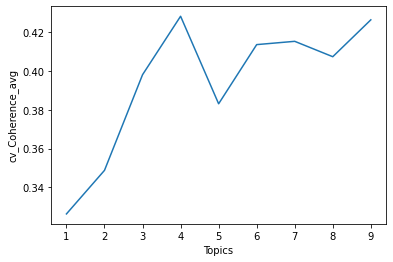

In [264]:
#this graph will illustrate where the highest coherence is. the peak represents the optimal number of topics for this data.
#mind that this data is neither complete, nor is the LDA function calibrated for you to identify the peak coherence easily.
#these processes take time and trial and error. 
#have a play with different chunksizes, passes and iterations - can you now run the function and identify a peak?

sns.lineplot(x='Topics', y='cv_Coherence_avg', data=pd.DataFrame(results))

In [265]:
results

{'Topics': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'cv_Coherence_avg': [0.32623985326377275,
  0.3487294019255829,
  0.3981024878002298,
  0.4282947378030847,
  0.38309929673966303,
  0.4136473777378204,
  0.41534542288343224,
  0.40740255628612054,
  0.42643649540247636]}

In [277]:
#run the algorithm for the optimal amount of topics 
#use the top words to identify your topics

lda_model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                    id2word=id2word,
                                                    num_topics=4, 
                                                    random_state=100,
                                                    chunksize=100,
                                                    passes=50,
                                                    workers=20,
                                                    iterations=150,
                                                    minimum_probability=0)

#print each topic and its top 10 words to identify what your topic is about!
#change the number of words printed by giving a different value to num_words. is the topic easier to interpret now?

for idx, topic in lda_model.show_topics(formatted=False, num_words= 10):
        print('Topic: {} \nWords: {}'.format(idx, [w[0] for w in topic]))


Topic: 0 
Words: ['boredom', 'nothing', 'drug', 'else', 'go', 'use', 'pandemic', 'using', 'something', 'month']
Topic: 1 
Words: ['time', 'smoking', 'cannabis', 'weed', 'le', 'bored', 'smoke', 'try', 'boredom', 'used']
Topic: 2 
Words: ['boredom', 'home', 'help', 'sleep', 'anxiety', 'cannabis', 'use', 'lockdown', 'stress', 'relax']
Topic: 3 
Words: ['cannabis', 'live', 'stress', 'make', 'need', 'fun', 'taking', 'much', 'friend', 'able']


In [279]:
#get the topic probability matrix
#this will indicate where each of the reasons in the data belongs to a topic

#get topic distribution probabilities
all_topics = lda_model.get_document_topics(corpus, minimum_probability=0.0)
doc_topic_dist_proc = gensim.matutils.corpus2csc(all_topics)
doc_topic_dist_numpy = doc_topic_dist_proc.T.toarray()
#doc_topic_dist = pd.DataFrame(doc_topic_dist_numpy)
    
#get dominant topic
topicnames = ['Topic_' + str(i+1) for i in range(0,4,1)] #7 is the number of topics!!
all_topics_df = pd.DataFrame(doc_topic_dist_numpy,columns=topicnames)
all_topics_df['dominant_topic_contribution'] = all_topics_df.max(axis = 1) 
all_topics_df['dominant_topic'] = np.argmax(all_topics_df.values, axis=1)
all_topics_df['dominant_topic_name'] = "Topic "+(all_topics_df['dominant_topic']+1).astype(str)



In [283]:
#each of the columns illustrates the probability of that reason being part of that topic 

all_topics_df

,Topic_1,Topic_2,Topic_3,Topic_4,dominant_topic_contribution,dominant_topic,dominant_topic_name
0,0.04,0.04,0.89,0.04,0.89,2,Topic 3
1,0.75,0.08,0.08,0.08,0.75,0,Topic 1
2,0.13,0.13,0.62,0.13,0.62,2,Topic 3
3,0.02,0.93,0.02,0.02,0.93,1,Topic 2
4,0.09,0.75,0.08,0.08,0.75,1,Topic 2
...,...,...,...,...,...,...,...
276,0.13,0.13,0.62,0.13,0.62,2,Topic 3
277,0.13,0.13,0.62,0.13,0.62,2,Topic 3
278,0.08,0.41,0.43,0.08,0.43,2,Topic 3
279,0.05,0.85,0.05,0.05,0.85,1,Topic 2


In [284]:
#look at the distribution of topics in your data

all_topics_df.dominant_topic_name.value_counts()

Topic 3    98
Topic 2    92
Topic 1    54
Topic 4    37
Name: dominant_topic_name, dtype: int64